# Introduction

This is notebook analyses the data from a projection of an evolutionary space debris model [DAMAGE](http://www.southampton.ac.uk/~hglewis/spacedebris/DAMAGE.html "DAMAGE description"). It investigates the amplification of the numbers of fragments that collisions generate themselves, which occurs due to follow-on collisions. The projected scenario is "mitigation only" with additional collision avoidance performed by active spacecraft.

# Read the data

Read the data about the number of fragments generated in DAMAGE collisions as well as the corresponding number of fragments in the final (2213) population snapshot, which every collision gave rise to. This accounts for the follow-on collisions that occurred in certain cases, as well as decay of fragments. Store the data in arrays and distinguish between all collisions and the subset of catastrophic collisions, which exceeded the $40\ J/g$ energy threshold.

The data are stored on GitHub. Will read one file at a time and cap the amount of characters to be read at any given time, not to clog the network.

In [6]:
import urllib2, numpy
from __future__ import print_function

# All collisions.
lines=urllib2.urlopen('https://raw.githubusercontent.com/AleksanderLidtke/\
AnalyseCollisionFragments/master/AllColGenerated').read(856393*25) # no. lines * no. chars per line
allColGen=numpy.array(lines.split('\n')[1:-1],dtype=numpy.float64) # Skip the header and the last empty line

lines=urllib2.urlopen('https://raw.githubusercontent.com/AleksanderLidtke/\
AnalyseCollisionFragments/master/AllColResulting').read(856393*25)
allColRes=numpy.array(lines.split('\n')[1:-1],dtype=numpy.float64)

assert allColGen.shape==allColRes.shape
print("Read data for {} collisions.".format(allColGen.size))

# Catastrophic collisions (a subset of all collisions).
lines=urllib2.urlopen('https://raw.githubusercontent.com/AleksanderLidtke/\
AnalyseCollisionFragments/master/CatColGenerated').read(500227*25) # Fewer lines for the subset of all collisions.
catColGen=numpy.array(lines.split('\n')[1:-1],dtype=numpy.float64)

lines=urllib2.urlopen('https://raw.githubusercontent.com/AleksanderLidtke/\
AnalyseCollisionFragments/master/CatColResulting').read(500227*25)
catColRes=numpy.array(lines.split('\n')[1:-1],dtype=numpy.float64)

assert catColGen.shape==catColRes.shape
print("Read data for {} catastrophic collisions.".format(catColGen.size))

Read data for 856392 collisions.
Read data for 500226 catastrophic collisions.


Learning
=====

Here we try to get some interesting stuff going.

Setup and data
-----------------

First, we import the useful modules and create some data:

In [2]:
import matplotlib.pyplot
import numpy
# Show the plots inside the notebook.
%matplotlib inline
# Make the figures high-resolution.
%config InlineBackend.figure_format='retina'

N=500 # No. points.
amp=0.1 # Noise apmplitude.
# Independent and dependent variables:
t=numpy.pi*numpy.linspace(0,2*numpy.pi,N) # Full phase.
y=numpy.sin(t) # Pristine signal
yNoise=y+amp*numpy.random.randn(N) # Add some noise.

/home/alek/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Eyeball
---------

Now, let's plot the data and see what happens:

/home/alek/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


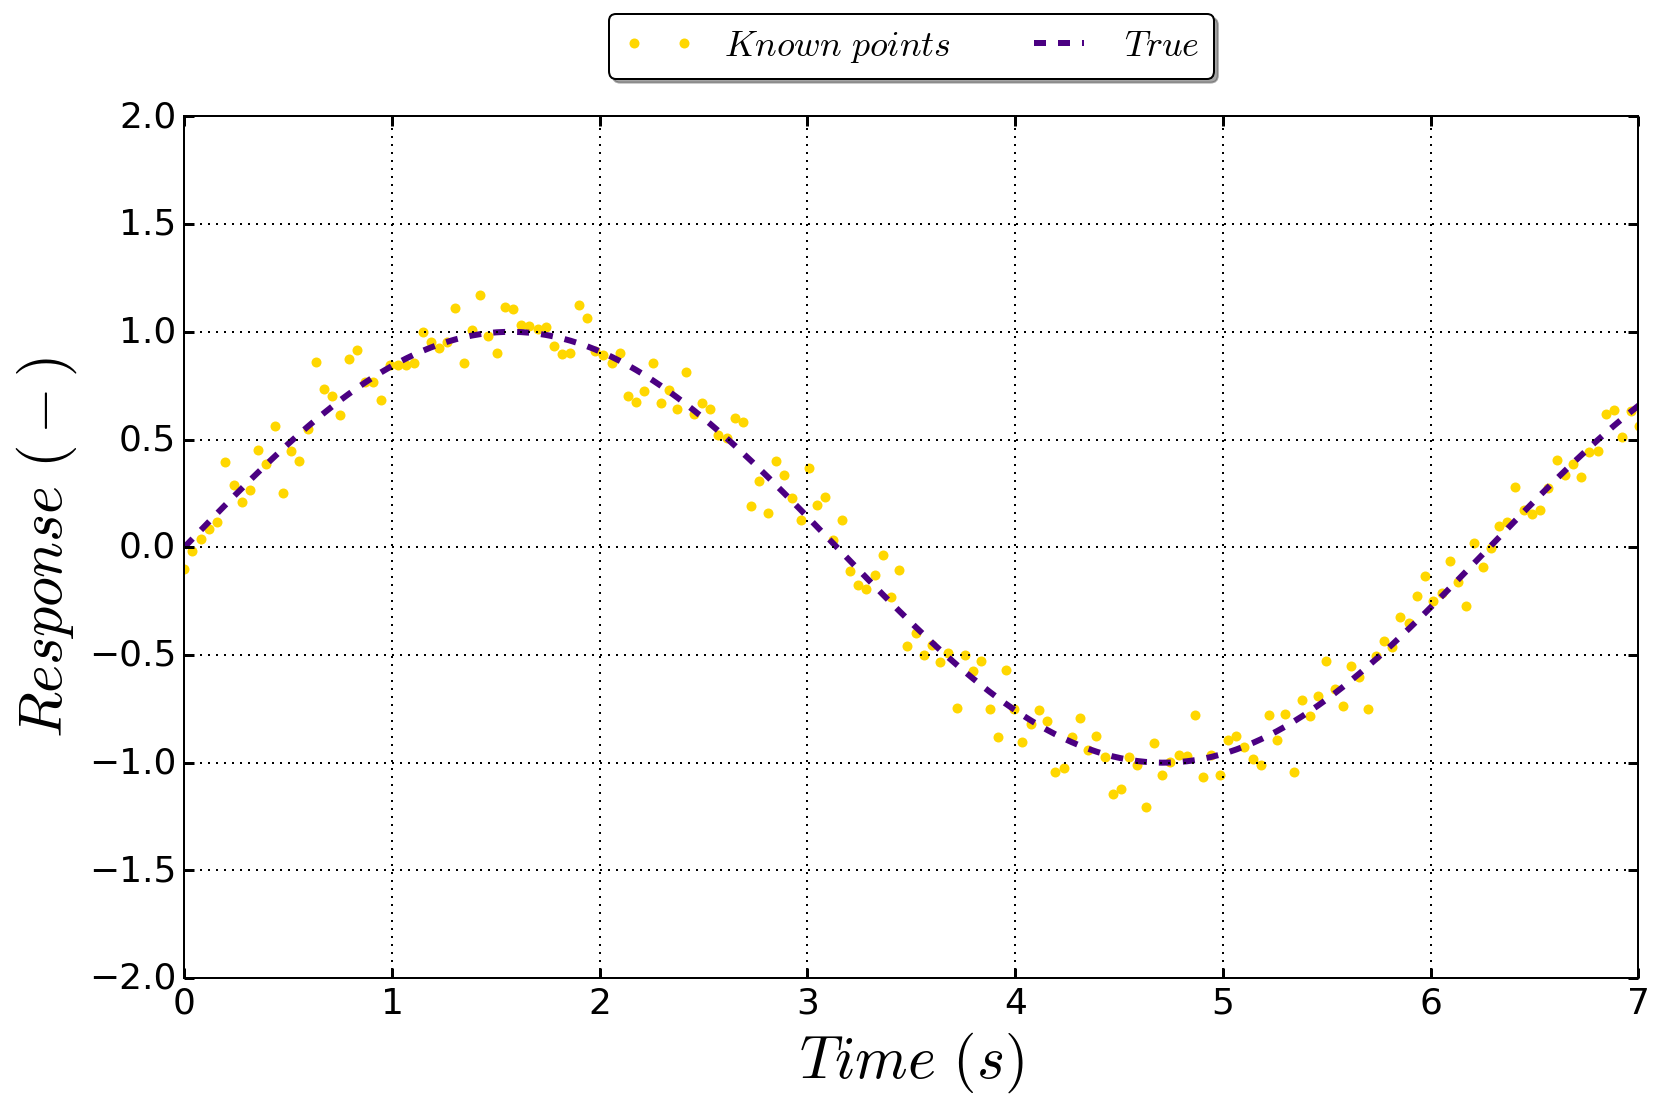

In [3]:
# Setup the plots.
ticksFontSize=18
labelsFontSizeSmall=20
labelsFontSize=30
titleFontSize=34
legendFontSize=18
matplotlib.rc('xtick', labelsize=ticksFontSize) 
matplotlib.rc('ytick', labelsize=ticksFontSize)

# Plot the data.
fig=matplotlib.pyplot.figure(figsize=(12,8))
ax=fig.gca()
matplotlib.pyplot.grid(linewidth=1)
ax.set_xlabel(r"$Time\ (s)$",fontsize=labelsFontSize)
ax.set_ylabel(r"$Response\ (-)$",fontsize=labelsFontSize)
ax.set_xlim(0,7)
ax.set_ylim(-2,2)
ax.plot(t,yNoise,label=r"$Known\ points$",marker='o',c='gold',markersize=5,mew=0,lw=0)
ax.plot(t,y,label=r"$True$",ls='--',c='indigo',markersize=0,lw=3)
ax.tick_params(axis='both',reset=False,which='both',length=5,width=1.5)
matplotlib.pyplot.subplots_adjust(left=0.1,right=0.95,top=0.95,bottom=0.1)
box=ax.get_position()
ax.set_position([box.x0+box.width*0.0,box.y0+box.height*0.05,box.width*0.99,box.height*0.88])
ax.legend(bbox_to_anchor=(0.5,1.14),loc='upper center',prop={'size':legendFontSize},fancybox=True,shadow=True,ncol=3)
fig.show()


Equations
-----------

An equation for the probability of any event from a series of $N$ events, each with individual probability $P(E_i)$, occurring:

$$ P(\text{any out of N})=1-P\left( \bigcap\limits_{i=1}^{N} \neg E_i\right)=1-\prod_{i=1}^{N}(1-P(E_i)). $$